In [106]:
import os
import plaid
from plaid import Client
import requests
import datetime
import json
import pandas as pd
%matplotlib inline
from pathlib import Path

In [107]:
def pretty_print_response(response):
  print(json.dumps(response, indent=4, sort_keys=True))

In [108]:
# API KEYS from environment variables

PLAID_CLIENT_ID = os.getenv('PLAID_CLIENT_ID')
PLAID_SECRET = os.getenv('PLAID_SECRET')
PLAID_PUBLIC_KEY = os.getenv('PLAID_PUBLIC_KEY')
PLAID_ENV = os.getenv('PLAID_ENV', 'sandbox')
PLAID_PRODUCTS = os.getenv('PLAID_PRODUCTS', 'transactions')

# Plaid Access Token

### 1. Create a client to connect to plaid

In [109]:
# INSTITUTION_ID = "ins_109508"

In [110]:
# Create Client Object 
client = plaid.Client(
    client_id=PLAID_CLIENT_ID, 
    secret=PLAID_SECRET, 
    environment=PLAID_ENV,
    api_version='2018-05-22')

### 2. Generate a public token

In [111]:
# Select Institution for processing 
INSTITUTION_ID = "ins_109508"

In [112]:
# Create Public Token 
create_response = client.Sandbox.public_token.create(INSTITUTION_ID, ['transactions', 'income', 'assets'])
create_response

{'public_token': 'public-sandbox-dbc283a8-593f-4855-a4b4-2efcd8404a6c',
 'request_id': 'dQV0bR2OqBDwW1n'}

### 3. Exchange the public token for an access token

In [113]:
# Exchange 
exchange_response = client.Item.public_token.exchange(create_response['public_token'])

In [114]:
# Store as variable
access_token = exchange_response['access_token']

### 4. Fetch Accounts

In [115]:
# Fetch 
client.Accounts.get(access_token)

{'accounts': [{'account_id': 'gEwjZ1eyNbFG3dW9mXAlSxQ6XgeawnCgxvvq4',
   'balances': {'available': 100,
    'current': 110,
    'iso_currency_code': 'USD',
    'limit': None,
    'unofficial_currency_code': None},
   'mask': '0000',
   'name': 'Plaid Checking',
   'official_name': 'Plaid Gold Standard 0% Interest Checking',
   'subtype': 'checking',
   'type': 'depository'},
  {'account_id': '8N4BVzL1vpFZpMgXEx9jiLNWo4X7anCwbkkjr',
   'balances': {'available': 200,
    'current': 210,
    'iso_currency_code': 'USD',
    'limit': None,
    'unofficial_currency_code': None},
   'mask': '1111',
   'name': 'Plaid Saving',
   'official_name': 'Plaid Silver Standard 0.1% Interest Saving',
   'subtype': 'savings',
   'type': 'depository'},
  {'account_id': 'E8RMEZxyn9CJlLXPvWAduRQez8j3XWtXqppJV',
   'balances': {'available': None,
    'current': 1000,
    'iso_currency_code': 'USD',
    'limit': None,
    'unofficial_currency_code': None},
   'mask': '2222',
   'name': 'Plaid CD',
   'officia

---

# Account Transactions with Plaid

### 1. Fetch the Transactions for the last 90 days

In [118]:
# Get transactions for institution for specific date range
start_date = '{:%Y-%m-%d}'.format(datetime.datetime.now() + datetime.timedelta(-90))
end_date = '{:%Y-%m-%d}'.format(datetime.datetime.now())

# Get transactions for date range
transaction_response = client.Transactions.get(access_token,start_date,end_date)
print(json.dumps(transaction_response['transactions'][:2],indent=4, sort_keys=True))

[
    {
        "account_id": "Waw6grEQpRCJgbPL7jQlu9e5qkXxRGtlkJJKX",
        "account_owner": null,
        "amount": 500,
        "authorized_date": null,
        "category": [
            "Travel",
            "Airlines and Aviation Services"
        ],
        "category_id": "22001000",
        "date": "2020-10-27",
        "iso_currency_code": "USD",
        "location": {
            "address": null,
            "city": null,
            "lat": null,
            "lon": null,
            "state": null,
            "store_number": null,
            "zip": null
        },
        "merchant_name": "United Airlines",
        "name": "United Airlines",
        "payment_channel": "in store",
        "payment_meta": {
            "by_order_of": null,
            "payee": null,
            "payer": null,
            "payment_method": null,
            "payment_processor": null,
            "ppd_id": null,
            "reason": null,
            "reference_number": null
        },
        

### 2. Print the categories for each transaction

In [119]:
# Print
for transaction in transaction_response['transactions']:
    print(transaction['category'])

['Travel', 'Airlines and Aviation Services']
['Travel', 'Taxi']
['Food and Drink', 'Restaurants']
['Payment']
['Food and Drink', 'Restaurants', 'Fast Food']
['Shops', 'Sporting Goods']
['Payment', 'Credit Card']
['Travel', 'Taxi']
['Transfer', 'Debit']
['Transfer', 'Deposit']
['Recreation', 'Gyms and Fitness Centers']
['Travel', 'Airlines and Aviation Services']
['Food and Drink', 'Restaurants', 'Fast Food']
['Food and Drink', 'Restaurants', 'Coffee Shop']
['Food and Drink', 'Restaurants']
['Transfer', 'Credit']
['Travel', 'Airlines and Aviation Services']
['Travel', 'Taxi']
['Food and Drink', 'Restaurants']
['Payment']
['Food and Drink', 'Restaurants', 'Fast Food']
['Shops', 'Sporting Goods']
['Payment', 'Credit Card']
['Travel', 'Taxi']
['Transfer', 'Debit']
['Transfer', 'Deposit']
['Recreation', 'Gyms and Fitness Centers']
['Travel', 'Airlines and Aviation Services']
['Food and Drink', 'Restaurants', 'Fast Food']
['Food and Drink', 'Restaurants', 'Coffee Shop']
['Food and Drink', 'R

### 3. Create a new DataFrame using the following fields from the JSON transaction data: date, name, amount, category. 

(For categories with more than one label, just use the first category label in the list)

In [120]:
# YOUR CODE HERE
account_summary_df = pd.DataFrame(columns = ['date', 'name', 'amount', 'category'])
transactions = transaction_response['transactions']
for x, transaction in enumerate(transactions):
    account_summary_df.loc[x] = [transaction['date'], transaction['name'], transaction['amount'], transaction['category'][0]]

account_summary_df.head()

,date,name,amount,category
0,2020-10-27,United Airlines,500,Travel
1,2020-10-25,Uber 072515 SF**POOL**,6.33,Travel
2,2020-10-22,Tectra Inc,500,Food and Drink
3,2020-10-21,AUTOMATIC PAYMENT - THANK,2078.5,Payment
4,2020-10-21,KFC,500,Food and Drink


### 4. Convert the data types to the appropriate types 

(i.e. datetimeindex for the date and float for the amount)

In [121]:
# YOUR CODE HERE
account_summary_df.dtypes


date        object
name        object
amount      object
category    object
dtype: object

In [122]:
account_summary_df['date'] = pd.to_datetime(account_summary_df['date'], format = '%Y-%m-%d', errors = 'coerce')
account_summary_df['amount'] = account_summary_df['amount'].astype('float')

In [123]:
account_summary_df.dtypes

date        datetime64[ns]
name                object
amount             float64
category            object
dtype: object

### Print to TXT file 

In [124]:

transaction_90 = Path('txt_files/transaction_90.txt')

In [125]:
with open(transaction_90, "w") as txt_file:
    txt_file.write(f"Client Transactions from the Past 90 Days \n")
    txt_file.write(f"{account_summary_df}")

---

# Income Analysis with Plaid

In [126]:
income = client.Income.get(access_token)
pretty_print_response(income)

{
    "income": {
        "income_streams": [
            {
                "confidence": 0.99,
                "days": 690,
                "monthly_income": 500,
                "name": "UNITED AIRLINES"
            }
        ],
        "last_year_income": 6000,
        "last_year_income_before_tax": 7285,
        "max_number_of_overlapping_income_streams": 1,
        "number_of_income_streams": 1,
        "projected_yearly_income": 6085,
        "projected_yearly_income_before_tax": 7389
    },
    "request_id": "LU7Lq5OCwaFfpSV"
}


In [127]:
print(income['income']['last_year_income'])

6000


In [128]:
print(income['income']['income_streams'][0]['monthly_income'])

500


In [129]:
print(income['income']['projected_yearly_income'])

6085


#### Print to txt file

In [130]:
income_analysis = Path('txt_files/income_analysis.txt')

In [131]:
with open(income_analysis, "w") as txt_file:
    txt_file.write(f"Client Income Analysis \n")
    txt_file.write(f"--------------------- \n")
    txt_file.write(f"Employer: {income['income']['income_streams'][0]['name']} \n")
    txt_file.write(f"Current Monthly Income: ${income['income']['income_streams'][0]['monthly_income']} \n")
    txt_file.write(f"Projected Year's Income Before Tax: ${income['income']['projected_yearly_income_before_tax']} \n")
    txt_file.write(f"Projected Year's Income After Tax: ${income['income']['projected_yearly_income']} \n")
    txt_file.write(f"Last Year's Income Before Tax: ${income['income']['last_year_income_before_tax']} \n")
    txt_file.write(f"Last Year's Income After Tax: ${income['income']['last_year_income']} \n")
    


---

# Budget Analysis

### Calculate the expenses per category

In [132]:
# YOUR CODE HERE
category_totals = account_summary_df.groupby('category').sum()['amount']
category_totals

category
Food and Drink     3317.19
Payment            6310.50
Recreation          235.50
Shops              1500.00
Transfer          20537.34
Travel               35.19
Name: amount, dtype: float64

In [149]:
cat_totals_df = pd.DataFrame(category_totals)

<AxesSubplot:ylabel='amount'>

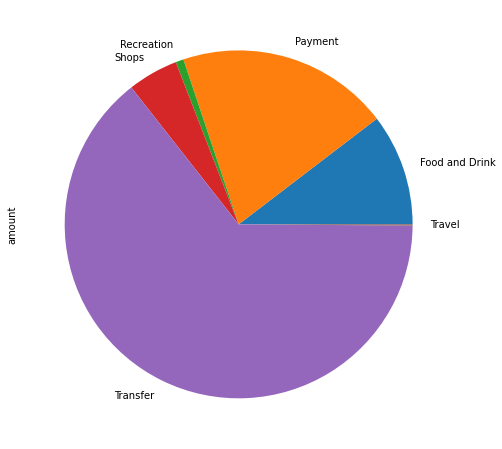

In [141]:
cat_totals_pie = category_totals.plot.pie(figsize=(10,8))
cat_totals_pie

### Calculate the expenses per month

In [134]:
account_summary_df['month'] = pd.DatetimeIndex(account_summary_df['date']).month
account_summary_df

,date,name,amount,category,month
0,2020-10-27,United Airlines,500.00,Travel,10
1,2020-10-25,Uber 072515 SF**POOL**,6.33,Travel,10
2,2020-10-22,Tectra Inc,500.00,Food and Drink,10
3,2020-10-21,AUTOMATIC PAYMENT - THANK,2078.50,Payment,10
4,2020-10-21,KFC,500.00,Food and Drink,10
5,2020-10-21,Madison Bicycle Shop,500.00,Shops,10
6,2020-10-12,CREDIT CARD 3333 PAYMENT *//,25.00,Payment,10
7,2020-10-12,Uber 063015 SF**POOL**,5.40,Travel,10
8,2020-10-11,ACH Electronic CreditGUSTO PAY 123456,5850.00,Transfer,10
9,2020-10-11,CD DEPOSIT .INITIAL.,1000.00,Transfer,10


In [135]:
monthly_expenses = account_summary_df.groupby('month').sum()
monthly_expenses

,amount
month,
8,10645.24
9,10645.24
10,10645.24


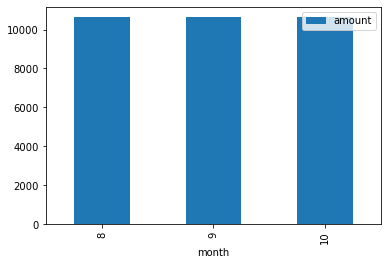

In [142]:
monthly_exp_bar = monthly_expenses.plot.bar()

### Print results to txt file 

In [139]:
past_90_report = Path('txt_files/past_90_report.txt')

In [154]:
with open(past_90_report, "w") as txt_file:
    txt_file.write(f"Client Yearly Budget Spend \n")
    txt_file.write(f"---------------------------- \n")
    txt_file.write(f"{cat_totals_df}\n")
    txt_file.write(f" \n")
    txt_file.write(f"Client Montly Expenses \n")
    txt_file.write(f"---------------------------- \n")
    txt_file.write(f"{monthly_expenses}\n")